In [6]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler

In [7]:
df=pd.read_csv(r"D:\DATA ANALYTICS\DATA SET\Honda_Data.csv")

In [8]:
print(df.head(10))

         Date  Adj_Close     Close      High       Low      Open  Volume
0  1980-03-17   0.547989  0.893750  0.909375  0.893750  0.893750   26000
1  1980-03-18   0.557569  0.909375  0.909375  0.909375  0.909375    2000
2  1980-03-19   0.551821  0.900000  0.900000  0.900000  0.900000    2000
3  1980-03-20   0.551821  0.900000  0.900000  0.900000  0.900000       0
4  1980-03-21   0.551821  0.900000  0.900000  0.900000  0.900000    2000
5  1980-03-24   0.553737  0.903125  0.903125  0.903125  0.903125   24000
6  1980-03-25   0.567150  0.925000  0.934375  0.925000  0.925000   18000
7  1980-03-26   0.553737  0.903125  0.909375  0.903125  0.909375    4000
8  1980-03-27   0.544157  0.887500  0.893750  0.887500  0.893750    4000
9  1980-03-28   0.544157  0.887500  0.887500  0.868750  0.887500    6000


In [9]:
print(df.tail(10))

             Date  Adj_Close      Close       High        Low       Open  \
11283  2024-12-17  25.260000  25.260000  25.930000  24.930000  25.000000   
11284  2024-12-18  24.040001  24.040001  24.840000  23.990000  24.500000   
11285  2024-12-19  23.700001  23.700001  23.840000  23.490000  23.549999   
11286  2024-12-20  23.889999  23.889999  24.100000  23.410000  23.540001   
11287  2024-12-23  26.930000  26.930000  27.490000  26.320000  27.330000   
11288  2024-12-24  27.250000  27.250000  27.490000  27.030001  27.490000   
11289  2024-12-26  28.370001  28.370001  28.459999  27.860001  28.100000   
11290  2024-12-27  28.760000  28.760000  29.100000  28.580000  29.000000   
11291  2024-12-30  28.500000  28.500000  28.980000  28.400000  28.980000   
11292  2024-12-31  28.549999  28.549999  28.770000  28.370001  28.370001   

        Volume  
11283  4032000  
11284  3146100  
11285  2392300  
11286  2519600  
11287  6264300  
11288  1889000  
11289  3216600  
11290  3091700  
11291  199

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11293 entries, 0 to 11292
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11293 non-null  object 
 1   Adj_Close  11293 non-null  float64
 2   Close      11293 non-null  float64
 3   High       11293 non-null  float64
 4   Low        11293 non-null  float64
 5   Open       11293 non-null  float64
 6   Volume     11293 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 617.7+ KB
None


In [11]:
print(df.isna().sum())

Date         0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [12]:
print(df.isna().sum().sum())

0


In [13]:
print(df.dropna(inplace=True))

None


In [14]:
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
11288    False
11289    False
11290    False
11291    False
11292    False
Length: 11293, dtype: bool


In [32]:
df = df.drop(columns = "Date", axis = 1)

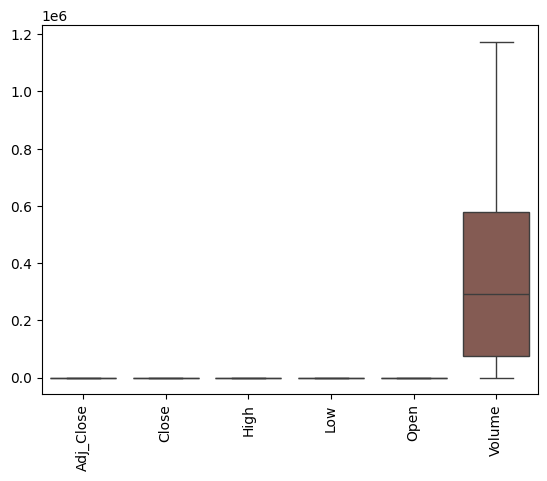

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df) 
plt.xticks(rotation=90)
plt.show()

In [34]:
df["z_score"]=(df["Volume"]-df["Volume"].mean())/df["Volume"].std()
threshold=1
df_no_outliers=df[df["z_score"].abs()<=threshold]
df=df_no_outliers.drop(columns=["z_score"])
print(df)

       Adj_Close      Close       High        Low       Open  Volume
91      0.632295   1.031250   1.043750   1.021875   1.028125   50000
92      0.624631   1.018750   1.031250   1.018750   1.031250  272000
93      0.620799   1.012500   1.012500   1.012500   1.012500  158000
94      0.624631   1.018750   1.021875   1.018750   1.018750  156000
95      0.632295   1.031250   1.037500   1.028125   1.028125  340000
...          ...        ...        ...        ...        ...     ...
11250  30.799999  30.799999  30.910000  30.760000  30.820000  553700
11251  30.309999  30.309999  30.629999  30.200001  30.610001  571100
11252  30.290001  30.290001  30.400000  30.209999  30.320000  514500
11253  30.270000  30.270000  30.559999  30.250000  30.400000  556400
11271  25.900000  25.900000  25.930000  25.709999  25.900000  588600

[6434 rows x 6 columns]


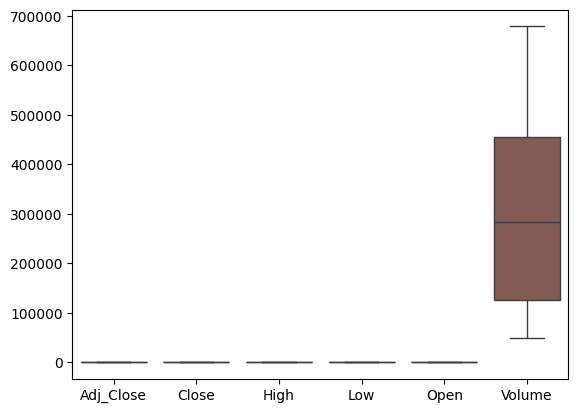

In [35]:
sns.boxplot(data=df)
plt.show()

In [36]:
cor=df.corr(numeric_only=True)
print(cor)

           Adj_Close     Close      High       Low      Open    Volume
Adj_Close   1.000000  0.988038  0.987759  0.988266  0.987954  0.512744
Close       0.988038  1.000000  0.999948  0.999949  0.999882  0.465639
High        0.987759  0.999948  1.000000  0.999931  0.999943  0.465456
Low         0.988266  0.999949  0.999931  1.000000  0.999936  0.465573
Open        0.987954  0.999882  0.999943  0.999936  1.000000  0.465408
Volume      0.512744  0.465639  0.465456  0.465573  0.465408  1.000000


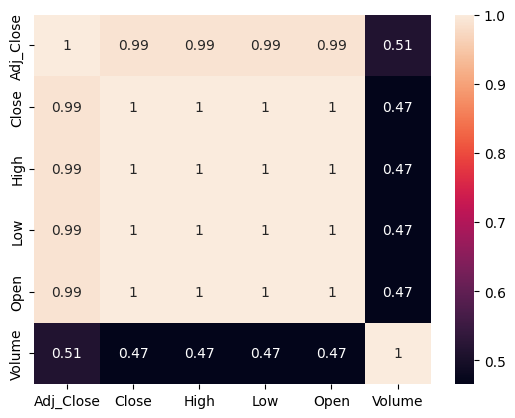

In [37]:
sns.heatmap(cor,annot=True)
plt.show()

In [38]:
print(df.cov(numeric_only=True))

               Adj_Close         Close          High           Low  \
Adj_Close      98.901875  1.180127e+02  1.185708e+02  1.173779e+02   
Close         118.012694  1.442465e+02  1.449621e+02  1.434302e+02   
High          118.570826  1.449621e+02  1.456965e+02  1.441467e+02   
Low           117.377932  1.434302e+02  1.441467e+02  1.426331e+02   
Open          117.997412  1.442231e+02  1.449551e+02  1.434220e+02   
Volume     953244.214962  1.045450e+06  1.050278e+06  1.039440e+06   

                   Open        Volume  
Adj_Close  1.179974e+02  9.532442e+05  
Close      1.442231e+02  1.045450e+06  
High       1.449551e+02  1.050278e+06  
Low        1.434220e+02  1.039440e+06  
Open       1.442338e+02  1.044885e+06  
Volume     1.044885e+06  3.494642e+10  


In [39]:
print(df.std(numeric_only=True))

Adj_Close         9.944942
Close            12.010266
High             12.070481
Low              11.942911
Open             12.009737
Volume       186939.608397
dtype: float64


In [40]:
print(df.describe())

         Adj_Close        Close         High          Low         Open  \
count  6434.000000  6434.000000  6434.000000  6434.000000  6434.000000   
mean     15.424694    20.254849    20.368676    20.126873    20.249925   
std       9.944942    12.010266    12.070481    11.942911    12.009737   
min       0.620799     1.012500     1.012500     1.012500     1.012500   
25%       4.547395     7.250000     7.270313     7.218750     7.237500   
50%      14.846166    21.096875    21.295000    20.915000    21.100000   
75%      24.729707    30.799999    31.007500    30.620001    30.850000   
max      37.279999    44.490002    44.560001    44.340000    44.340000   

              Volume  
count    6434.000000  
mean   302660.102580  
std    186939.608397  
min     48600.000000  
25%    125650.000000  
50%    284500.000000  
75%    455925.000000  
max    679000.000000  


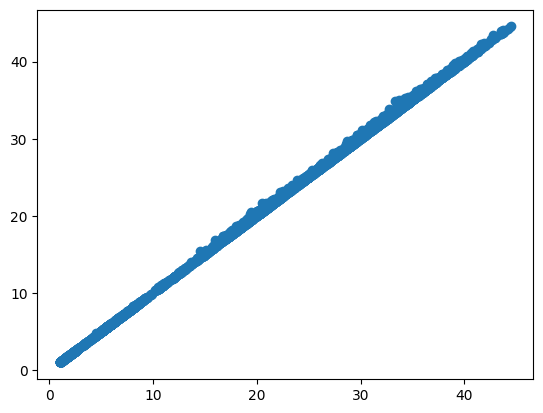

In [41]:
x=df.drop(["High"],axis=1)
y=df["High"]
x=pd.DataFrame(x)
plt.scatter(df["Close"],df["High"])
plt.show()

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
x_train

,Adj_Close,Close,Low,Open,Volume
7979,24.691082,32.549999,32.189999,32.459999,651700
9838,23.433096,27.280001,27.160000,27.459999,544900
5703,14.166367,20.049999,19.809999,20.150000,109000
8126,24.358429,31.790001,31.639999,31.900000,389000
5249,11.830100,16.937500,16.875000,17.093750,50800
...,...,...,...,...,...
8182,25.633581,33.230000,33.150002,33.320000,153800
5820,12.022696,16.950001,16.840000,16.879999,405800
3158,3.423836,5.406250,5.406250,5.437500,53200
5016,12.196762,17.562500,17.484375,17.625000,68800


In [44]:
x_test

,Adj_Close,Close,Low,Open,Volume
6574,22.840431,31.290001,31.100000,31.100000,396900
7650,23.029835,30.360001,30.080000,30.120001,567900
4452,11.697599,17.000000,17.000000,17.562500,258800
8521,32.485840,41.110001,41.000000,41.040001,188700
6122,16.219585,22.690001,22.660000,22.740000,203700
...,...,...,...,...,...
7013,24.980640,33.139999,32.980000,33.009998,271200
1938,2.844888,4.625000,4.600000,4.662500,422000
9920,22.585966,25.879999,25.879999,25.980000,475800
9597,28.987051,34.230000,34.060001,34.520000,667600


In [45]:


y_train

7979    32.650002
9838    27.520000
5703    20.389999
8126    31.990000
5249    17.343750
          ...    
8182    33.360001
5820    16.980000
3158     5.468750
5016    17.750000
5238    17.750000
Name: High, Length: 5147, dtype: float64

In [46]:
y_test

6574    31.549999
7650    30.510000
4452    17.562500
8521    41.330002
6122    22.940001
          ...    
7013    33.490002
1938     4.675000
9920    26.090000
9597    34.610001
2261     7.943750
Name: High, Length: 1287, dtype: float64

In [49]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [48]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_pred,y_test)*100
print(accuracy)

99.99588933614
